# Generating Continuos Random Variables

**Proposition:** Let be a uniform(0,1) random variable $U$. For any continuos distribution function F the random variable Y defined by: <br><br>
$$
X = F^{-1}(U)
$$<br>
has distribution $F$. <br>
We can easily demonstrate the preposition above: suppose to have a continuos random variables $X$; we can demostrate that $Y = F^{-1}_X(U)$ is distributed like X <br><br>
$$ F_Y(x) = P(Y \le x) = P(F^{-1}(U) \le x) = P(F_X(F_X^{-1}(U) \le F_x(x)) = P(U \le F_x(x)) = F_X(x)) = F_X(x) $$

With this result, called **Inverse transform** approach, we can generate every continuos random variable $X$ if we know its inverse cumulative function. In the next paragraphs we will show some example. 
### Generating uniform distribution with values from $a$ to $b$
The simplest continous random variable is the uniform distribution with values within two parameters ($A$ and $B$), formally $X \sim U([a, b])$ with cumulative mass function $ F_X(x) = \frac{x - a}{b - a} $. Our distribution can be generated by generating a random number U and setting $ X = a+U(b-a) $. <br>
The following python code simulate $n$ specification of $X$ and show its cumulative distribution function. We can see that the points approximate the theoretical cumulative distribution function better with big values of $n$.

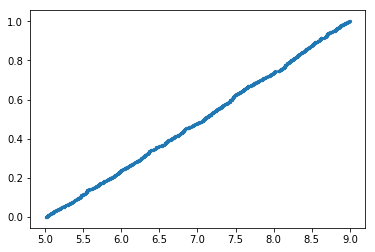

<function __main__.<lambda>>

In [55]:
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import ipywidgets as widgets

def ecdf(data):
    return lambda x: sum([1. if d <= x else 0. for d in data]) / len(data)

def uniform_cont(a, b):
    u = random.random()
    return a+u*(b-a)

def plot_ecdf(sim_f, params, n):
    x_ecdf = [sim_f(*params) for i in range(1,n)]
    y_ecdf = map(ecdf(x_ecdf), x_ecdf)
    plt.scatter(x_ecdf, y_ecdf, s=5)
    plt.show()

f = lambda n: plot_ecdf(uniform_cont, [5, 9], n)
widgets.interact(f, n={10:10,100:100, 1000: 1000, 10000: 10000})    

#@widgets.interact(n={10:10,100:100, 1000: 1000, 10000: 10000})
#def plot_ecdf(n):
#    x_ecdf = [uniform_cont(5,9) for i in range(1,n)]
#    y_ecdf = map(ecdf(x_ecdf), x_ecdf)
#    plt.scatter(x_ecdf, y_ecdf, s=5)
#    plt.show()

### Generating exponential distribution

Given an exponential random variable $X \sim E(\lambda)$, as well know its distribution function is given by $F_X(x) = 1-e^{-\lambda x}$. If we let $x = F^{-1}(\mu)$, then $\mu = F(x) = 1 - e^{-\lambda x} => x = -\frac{1}{\lambda}ln(1-\mu)$. <br>
So we can simulate the exponential random variable $X$ simply generating a random value $U$ and then setting $ X = -\frac{1}{\lambda}ln(U)$, note that $1 - U$ is also uniform in $(0,1)$ so we can save some computational time avoiding the subtraction. <br>
Also in this case we provide a python simulation. 

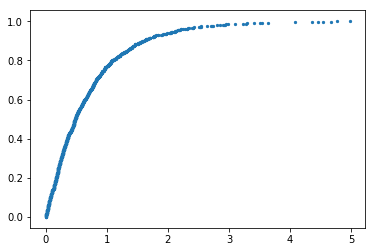

In [57]:
def exponential_cont(lam):
    u = random.random()
    return (-1/lam)*np.log(u)

f = lambda n, lam: plot_ecdf(exponential_cont, [lam], n)
widgets.interact(f, lam =(0.1, 2.0, 0.1) ,n={10:10,100:100, 1000: 1000, 10000: 10000})

#@widgets.interact(lam =(0.1, 2.0, 0.1), n={10:10,100:100, 1000: 1000, 10000: 10000})
#def plot_ecdf(n, lam):
#    x_ecdf = [exponential_cont(lam) for i in range(1,n)] 
#    y_ecdf = map(ecdf(x_ecdf), x_ecdf)
#    plt.scatter(x_ecdf, y_ecdf, s=5)
#    plt.show()

### Generating double exponential distribution
Given a continuos random variable $X$ with its probability density function 
$$ f_X(x) = \frac{1}{2\beta}e^{-\frac{|x-\alpha|}{\beta}} \ \text{where} \ \alpha\in\mathbb{R} \ \text{and} \ \beta\in\mathbb{R}^{+}  $$
this distribution is always called double exponential distribution. <br>
Now we derive the cumulative distribution function for $x \ge \alpha$ and $x < \alpha$, for the first case we have

$$
F_X(x) = \int_{-\infty}^{x} f_X(x) \delta x = \int_{-\infty}^{\alpha} \frac{1}{2\beta}e^{\frac{x-\alpha}{\beta}} \delta x
+ \int_{\alpha}^{x} \frac{1}{2\beta}e^{\frac{-x-\alpha}{\beta}} \delta x
$$

we can do the following variable substitution 
$$ 
y= \frac{x-\alpha}{\beta}, \ \delta y = \frac{\delta x}{\beta}
$$
with this new variable we can rewrite the integral as follow and calculate its final value
$$
\int_{-\infty}^{0} \frac{1}{2}e^{y} \delta y
+ \int_{0}^{\frac{x-\beta}{\beta}} \frac{1}{2}e^{-y} \delta y = 1 - \frac{1}{2}e^{-\frac{x-\beta}{\beta}}
$$

With similar approach we can derive that $F_X(x) = \frac{1}{2}e^{\frac{x-\alpha}{\beta}}$ for $x < \alpha$. We can now generate a double exponential distribution considering the inverse of $F_X(x)$ derived above 
$$
X = 
\begin{cases} 
    \alpha-\beta ln(2(1-U)) & \text{if } \ U \ge \frac{1}{2} \\  \alpha+\beta ln(2U) & \text{otherwise} 
\end{cases}
$$
where $U$ is a random number.

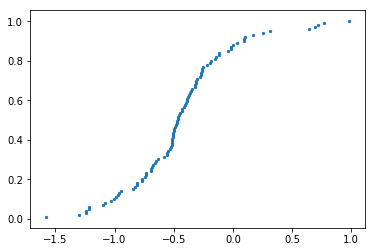

In [59]:
def double_exponential_cont(alpha, beta):
    u = random.random()
    if u >= 0.5:
        return alpha - beta*np.log(2*(1-u))
    else:
        return alpha + beta*np.log(2*u)

f = lambda n, alpha, beta: plot_ecdf(double_exponential_cont, [alpha, beta], n)
widgets.interact(f, alpha=(-2.0, 2.0, 0.1), beta=(0.0, 2.0, 0.1) ,n={10:10,100:100, 1000: 1000, 10000: 10000})    


#@widgets.interact(alpha=(-2.0, 2.0, 0.1), beta=(0.0, 2.0, 0.1), n={10:10,100:100, 1000: 1000, 10000: 10000})
#def plot_ecdf(n, alpha, beta):
#    x_ecdf = [double_exponential_cont(alpha, beta) for i in range(1,n)]
#    y_ecdf = map(ecdf(x_ecdf), x_ecdf)
#    plt.scatter(x_ecdf, y_ecdf, s=5)
#    plt.show()

### Generating normal random variables

A more interesting problem is to generate a normal random variable, remember that a normal random variable $X$ have mean and variance respectively 0 and 1 and probability density function
$$ f_X(x) = \frac{1}{\sqrt{2\pi}} e^{\frac{-x^{2}}{2}} $$

We could now explain the **polar method** for generating normal random variable, let $X$ and $Y$ two normal random variable independent and indetically distributed, their joint density is given by
$$ 
\begin{aligned}
    f_{X, Y}(x,y) = f_X(x)f_Y(y)
    = \frac{1}{\sqrt{2\pi}}e^{\frac{-x^{2}}{2}}\frac{1}{\sqrt{2\pi}}e^{\frac{-y^{2}}{2}}
    = \frac{1}{2\pi}e^{-\frac{x^2+y^2}{2}}
\end{aligned}
$$

For definition to obtain the cumulative distribution function we must integrate the joint density described above
$$
F_{X,Y}(x,y) = \int_{-\infty}^{\overline{x}}\int_{-\infty}^{\overline{y}}\frac{1}{2\pi}e^{-\frac{x^2+y^2}{2}}\delta x \delta y
$$

Now, to solve the integral, we can transform the variables in polar coordinates then $x = \sqrt{d}cos(\theta)$ and $y = \sqrt{d}sin(\theta)$, to rewrite the integral properly we must calculate the determinat of the Jacobian matrix $J$

$$
J = 
\begin{bmatrix}
\frac{\delta x}{\delta d} & \frac{\delta x}{\delta \theta} \\[0.8em]
\frac{\delta y}{\delta d} & \frac{\delta y}{\delta \theta} \\[0.8em]
\end{bmatrix} 
$$

$$
\text{det}(J) = \frac{1}{2}cos^2 \theta + \frac{1}{2}sin^2 \theta = \frac{1}{2}
$$

Now the integral can be rewritten with the new variables $d$ and $\theta$ instead $x$ and $y$

$$
\int_{-\infty}^{\overline{x}}\int_{-\infty}^{\overline{y}}\frac{1}{2\pi}e^{-\frac{x^2+y^2}{2}}\delta x \delta y
= \int_{0}^{\overline{d}}\int_{0}^{\overline{\theta}}\frac{1}{2}\frac{1}{2\pi}e^{\frac{-d}{2}}\delta d\delta\theta
= \underbrace{\int_{0}^{\overline{d}} \frac{1}{2} e^{-\frac{d}{2}} \delta d}_{E} \underbrace{\int_{0}^{\overline{\theta}} \frac{1}{\pi} \delta \theta}_{U}
$$

Look at the integral in the last form: the two term (indicated by $E$ and $U$) are, for definition, the cumulative distribution function of two well known random variables, respectively exponential and uniform. <br>
Now we can generate a pair of independent standard normal random variables $X$ and $Y$ using their polar cordinate and transforme back to rectangular coordinates

$$
X = \sqrt{\underbrace{-2ln(U_1)}_{d}}cos(\underbrace{2\pi U_2}_{\theta})\\
Y = \sqrt{\underbrace{-2ln(U_1)}_{d}}sin(\underbrace{2\pi U_2}_{\theta})
$$

where $U_1$ and $U_2$ are two random numbers.
As before we give a short python implementation of this technique

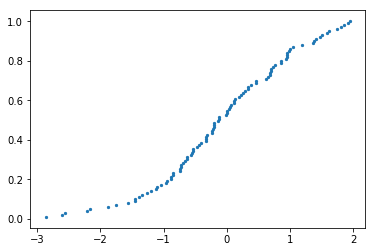

In [62]:
def normal_cont():
    u_d = random.random()
    u_theta = random.random()
    d = -2*np.log(u_d)
    theta = 2*np.pi*u_theta
    x = np.sqrt(d)*np.cos(theta)
    return x

f = lambda n: plot_ecdf(normal_cont, [], n)
widgets.interact(f, n={10:10,100:100, 1000: 1000, 10000: 10000}) 

#x_ecdf = [normal_cont() for i in range(1,1000)]
#y_ecdf = map(ecdf(x_ecdf), x_ecdf)
#plt.scatter(x_ecdf, y_ecdf, s=5)
#plt.show()

#### Approximate method
The previous approch is very accurate but expensive. For this reason there is an approximate method that uses the central limit theorem.<br>
This theorem says that, given certain conditions, the arithmetic mean of a sufficiently large number of iterates of independent random variables, each with a well-defined (finite) expected value and finite variance, will be approximately normally distributed, regardless of the underlying distribution. In more precise terms, given a sequence of independent and identically distributed random variables $X_1..X_n$:
 
\begin{equation*}
Z_\mu = \frac{\overline  X - \mu} {\frac{\sigma}{\sqrt{n}}}
\end{equation*}
$\overline X$ is the sample mean, $n$ the sample size, $\mu$ mean and $\sigma$ standard deviation of the $X_i$. This distribution as n approaches infinity, tends to a standard normal distribution.
\begin{equation*}
Z_\mu = \frac{\frac{1}{n} \sum^{n}_{i=1}(X_i-\mu)} {\frac{\sigma}{\sqrt{n}}} =
\frac{1}{\sqrt n}\frac{\sum^{n}_{i=1}(X_i-\mu)} {\sigma} =
\frac{1}{\sqrt n}\frac{\sum^{n}_{i=1}(X_i-\mu)} {\sigma} =
\frac{1}{\sqrt n}\sum^{n}_{i=1}X_i^*
\end{equation*}
Considering $X_i$ as $U$ uniform distributions in $[0,1]$:
\begin{equation*}
E[U]=\frac{1}{2}\\
E[U^2] = \frac{1}{3}\\
Var(U) = E[U^2] - E[U]^2 = \frac{1}{3} - \frac{1}{4} = \frac{1}{12} \\
X^* = \frac{X - \frac{1}{2}} {\sqrt{\frac{1}{12}}}
\end{equation*}
Therefore a significant choice is $n=12$:

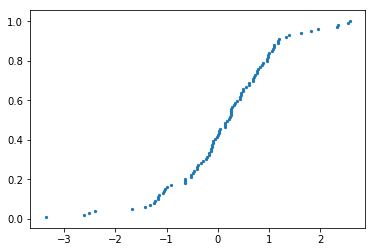

In [63]:
def normal_cont_approx(n=12):
    X = [uniform_cont(0,1) for i in range(0,n)]
    return np.sqrt(12/n)*sum(X)-n/2

f = lambda n: plot_ecdf(normal_cont_approx, [], n)
widgets.interact(f, n={10:10,100:100, 1000: 1000, 10000: 10000}) 

#x_ecdf = [normal_cont_approx(12) for i in range(1,10000)] 
#y_ecdf = map(ecdf(x_ecdf), x_ecdf)
#plt.scatter(x_ecdf, y_ecdf, s=5)
#plt.show()

In general, any singol random variable (iid) $X_i$ can be approximed as a normal distribution with mean $\mu$ and variance $\sigma^2$ with:
$$X=\mu+\sigma \cdot Z$$